In [2]:
pip install chess

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import os
print(os.getcwd())

/kaggle/working


In [74]:
!ls /kaggle/input

35-million-chess-games


In [75]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/35-million-chess-games/all_with_filtered_anotations_since1998.txt
/kaggle/input/35-million-chess-games/all_with_filtered_anotations/all_with_filtered_anotations_since1998.txt


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import pandas as pd

# max allowable data size (currently 1 million)
max_data_size = 2*1e6

# path = '/kaggle/input/35-million-chess-games/all_with_filtered_anotations_since1998.txt'
path = '/kaggle/input/35-million-chess-games/all_with_filtered_anotations_since1998.txt'

data_final = []

with open(path) as file:
    count = 0
    for line in file:

        # first few lines are not useful
        if count <= 4:
            count += 1
            continue

        row = line.split(' ')
        
        # row[1] is date
        # row[2] is result
        # row[17] is W1
        # row[18] is B1 and so on ....
        # taking first 6 moves
        try:
            data_final.append([row[1] , row[2], row[17],row[18],row[19],row[20],row[21],row[22]])
        except:
            continue

        count = count+1
        if count == max_data_size:
            break


df = pd.DataFrame(data_final)
data_csv = df.to_csv('my_project_data.csv' , index=True)

In [84]:
df.head()

,0,1,2,3,4,5,6,7
0,2000.03.14,1-0,W1.d4,B1.d5,W2.c4,B2.e6,W3.Nc3,B3.Nf6
1,2000.03.14,1-0,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
2,1999.11.20,1-0,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bc4,B3.Bc5
3,1999.11.20,1-0,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
4,2000.02.20,1/2-1/2,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bb5,B3.a6


In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('my_project_data.csv')


# Define a dictionary to map the old values to the new values
replace_dict = {'1-0': 1, '1/2-1/2': 0.5, '0-1': 0}

# Replace the values in the second column using the dictionary
df['1'] = df['1'].replace(replace_dict)


In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,2000.03.14,1,W1.d4,B1.d5,W2.c4,B2.e6,W3.Nc3,B3.Nf6
1,1,2000.03.14,1,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
2,2,1999.11.20,1,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bc4,B3.Bc5
3,3,1999.11.20,1,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
4,4,2000.02.20,0.5,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bb5,B3.a6


In [5]:
# Create a histogram with first move as x axis and result frequancy as y axis 
# 1 indicates win, 0.5 indicates draw and 0 indicates loss

# move = []
first_moves = {
    'a3':[0,0,0],
    'a4':[0,0,0],
    'b3':[0,0,0],
    'b4':[0,0,0],
    'c3':[0,0,0],
    'c4':[0,0,0],
    'd3':[0,0,0],
    'd4':[0,0,0],
    'e3':[0,0,0],
    'e4':[0,0,0],
    'f3':[0,0,0],
    'f4':[0,0,0],
    'g3':[0,0,0],
    'g4':[0,0,0],
    'h3':[0,0,0],
    'h4':[0,0,0],
    'Na3':[0,0,0],
    'Nc3':[0,0,0],
    'Nf3':[0,0,0],
    'Nh3':[0,0,0]    
}

for idx, row in df.iterrows():
    key = row['2'].split('.')[-1]
    if first_moves.get(key) != None:
        if row['1'] == 1:
            first_moves[key][0] += 1
        elif row['1'] == 0.5:
            first_moves[key][1] += 1
        else:
            first_moves[key][2] += 1
#         print(row)
#     move.append(row['2'].split('.')[-1])
#     result.append()
    
#     print(row['2'].split('.')[-1], row['1'])



In [6]:
# import numpy as np
# np.unique(np.array(move))

# print(first_moves.get('l4'))
first_moves
win = []
draw = []
lose = []

for k in first_moves.keys():
    total = sum(first_moves[k])
    first_moves[k][0] /= (total*0.01)
    first_moves[k][1] /= (total*0.01)
    first_moves[k][2] /= (total*0.01)
    
    win.append(first_moves[k][0])
    draw.append(first_moves[k][1]  + first_moves[k][0] )
    lose.append(first_moves[k][2] + first_moves[k][1]  + first_moves[k][0])
    

# print(first_moves)
# print(first_moves.keys())
# print(win)
# print(draw)
# print(lose)

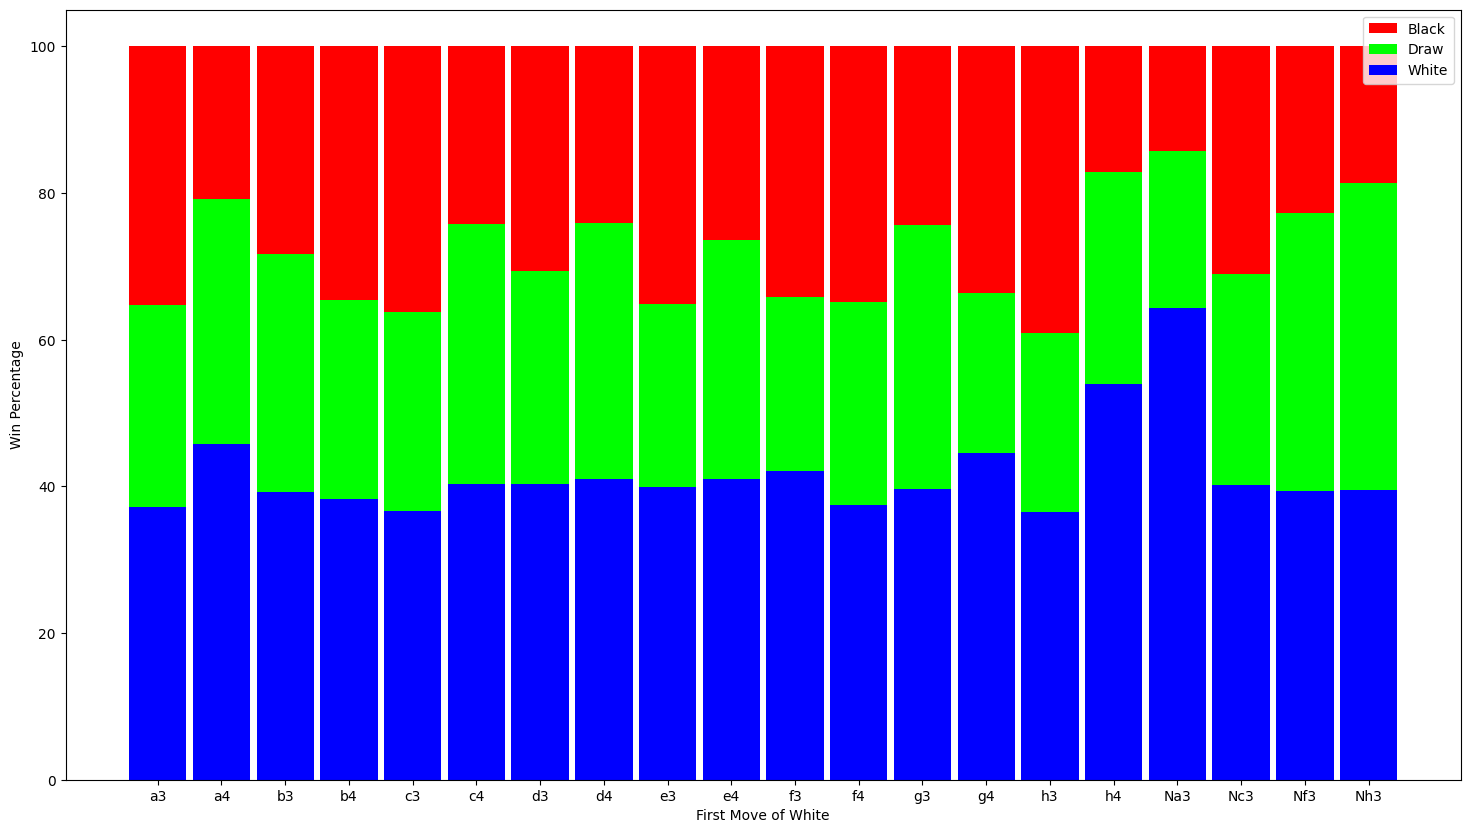

In [7]:


f, ax = plt.subplots(figsize=(18,10))
plt.bar(first_moves.keys(), lose , color = (1,0,0,1),width = 0.9)
plt.bar(first_moves.keys(), draw , color = (0,1,0,1),width = 0.9)
plt.bar(first_moves.keys(), win , color = (0,0,1,1),width = 0.9)
plt.legend(['Black', 'Draw','White'])
plt.xlabel("First Move of White")
plt.ylabel("Win Percentage")
# ax.legend(fontsize = 10)
plt.show()

In [91]:
# move = []
first_moves = {
    'Nh6':[0,0,0],
    'Nf6':[0,0,0],
    'Nc6':[0,0,0],
    'Na6':[0,0,0],
    'h6':[0,0,0],
    'g6':[0,0,0],
    'f6':[0,0,0],
    'e6':[0,0,0],
    'd6':[0,0,0],
    'c6':[0,0,0],
    'b6':[0,0,0],
    'a6':[0,0,0],
    'h5':[0,0,0],
    'g5':[0,0,0],
    'f5':[0,0,0],
    'e5':[0,0,0],
    'd5':[0,0,0],
    'c5':[0,0,0],
    'b5':[0,0,0],
    'a5':[0,0,0]    
}

for idx, row in df.iterrows():
    key = row['3'].split('.')[-1]
    if first_moves.get(key) != None:
        if row['1'] == 1:
            first_moves[key][0] += 1
        elif row['1'] == 0.5:
            first_moves[key][1] += 1
        else:
            first_moves[key][2] += 1
#         print(row)
#     move.append(row['2'].split('.')[-1])
#     result.append()
    
#     print(row['2'].split('.')[-1], row['1'])

In [92]:
# import numpy as np
# np.unique(np.array(move))

# print(first_moves.get('l4'))
first_moves
win = []
draw = []
lose = []

for k in first_moves.keys():
    total = sum(first_moves[k])
    first_moves[k][0] /= (total*0.01)
    first_moves[k][1] /= (total*0.01)
    first_moves[k][2] /= (total*0.01)
    
    win.append(first_moves[k][0])
    draw.append(first_moves[k][1]  + first_moves[k][0] )
    lose.append(first_moves[k][2] + first_moves[k][1]  + first_moves[k][0])
    

# print(first_moves)
# print(first_moves.keys())
# print(win)
# print(draw)
# print(lose)

In [6]:
import warnings
warnings.filterwarnings('ignore')

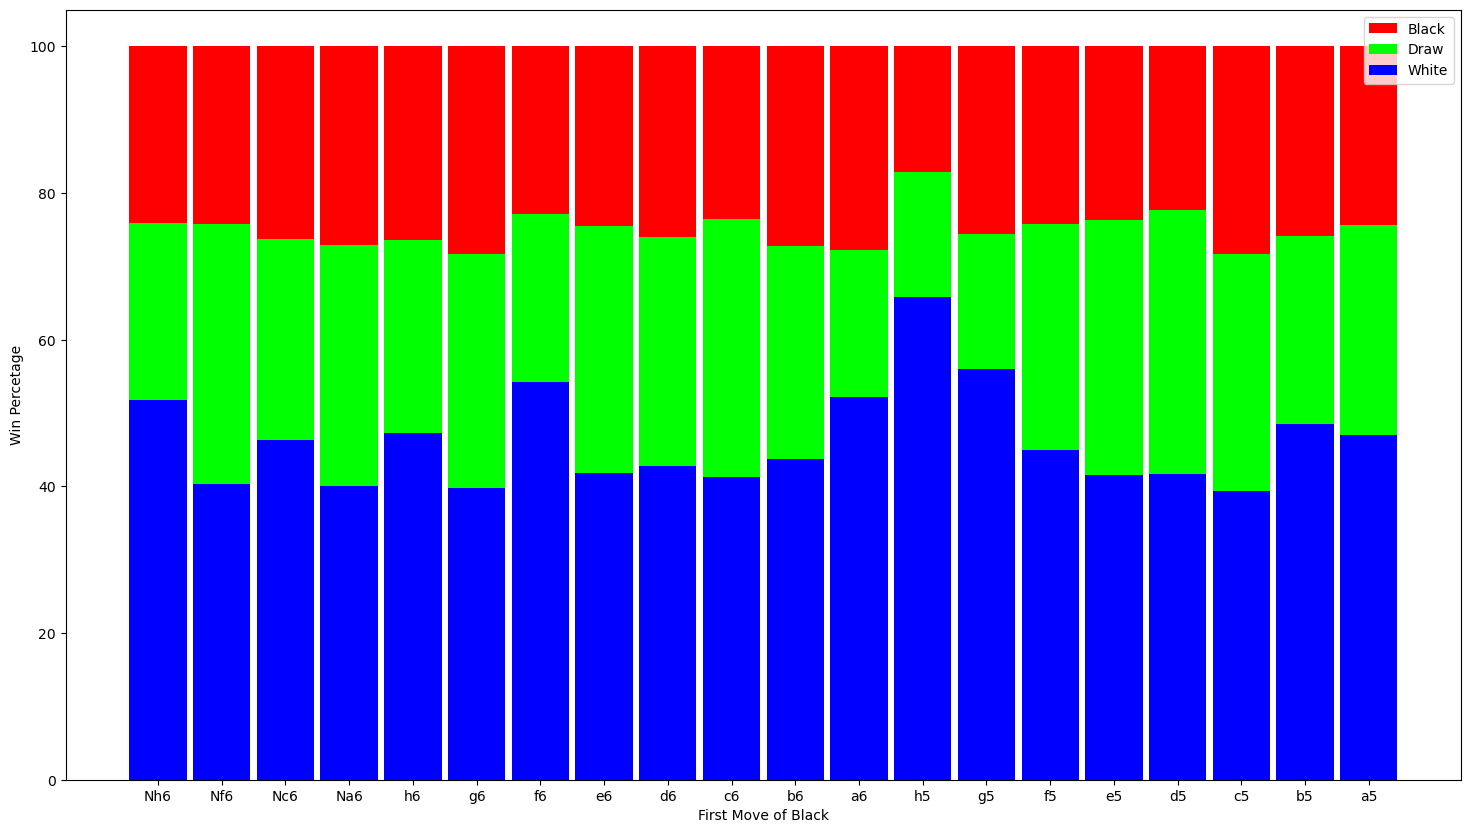

In [93]:
f, ax = plt.subplots(figsize=(18,10))
plt.bar(first_moves.keys(), lose , color = (1,0,0,1),width = 0.9)
plt.bar(first_moves.keys(), draw , color = (0,1,0,1),width = 0.9)
plt.bar(first_moves.keys(), win , color = (0,0,1,1),width = 0.9)
plt.legend(['Black', 'Draw','White'])
plt.xlabel("First Move of Black")
plt.ylabel("Win Percetage")
# ax.legend(fontsize = 10)
plt.show()

In [7]:
df.columns =['Index', 'Date', 'Result', 'W1', 'B1', 'W2', 'B2', 'W3', 'B3']
original_df = df
df.head()

,Index,Date,Result,W1,B1,W2,B2,W3,B3
0,0,2000.03.14,1,W1.d4,B1.d5,W2.c4,B2.e6,W3.Nc3,B3.Nf6
1,1,2000.03.14,1,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
2,2,1999.11.20,1,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bc4,B3.Bc5
3,3,1999.11.20,1,W1.e4,B1.d5,W2.exd5,B2.Qxd5,W3.Nc3,B3.Qa5
4,4,2000.02.20,0.5,W1.e4,B1.e5,W2.Nf3,B2.Nc6,W3.Bb5,B3.a6


In [8]:
# returns a list of empirical probabilities [win draw lose] for White based on current data frame df
def prob(df):
    print(len(df.loc[df.Result==1]))
    win_cases = float(len(df.loc[df.Result==1]))
    lose_cases = float(len(df.loc[df.Result==0]))
    draw_cases = float(len(df.loc[df.Result==0.5]))
    
    total = win_cases + lose_cases + draw_cases
    try:
        return [win_cases/total , draw_cases/total , lose_cases/total]
    except:
        return [0.0 , 0.0, 0.0]

In [9]:
print(len(df))
print(len(df[df.Result==0]))
print(len(df[df.Result==0.5]))
print(len(df[df.Result==1.0]))

1999995
503137
681179
815671


In [10]:
def find_player(i):
    color = ""
    if i%2==0:
        color = "W"
    else:
        color = "B"
    return (color + str(i/2+1))[:2]

In [11]:
# filtering function

def filter(user_move , i):
    if user_move=="reset" or i>=5:
        return
    global df
    
    color = ""
    if i%2==0:
        color = "W"
    else:
        color = "B"
    index_key = (color + str(i/2+1))[:3]
    user_move = index_key + user_move
    print(user_move)
    
    
    if i==0:
        df = df.loc[df.W1 == user_move]
    elif i==1:
        df = df[df.B1==user_move]
    elif i==2:
        df = df[df.W2==user_move]
    elif i==3:
        df = df[df.B2==user_move]
    elif i==4:
        df = df[df.W3==user_move]
    else:
        df = df[df.B3==user_move]
    
    prob_array = np.array(prob(df))
    
#     plot a pie chart
    try:
        my_labels = ["White" , "Draw", "Black"]
        # plt.ion()
        plt.pie(prob_array , labels=my_labels)
        
        plt.show()
        print(prob_array)
    except:
        print("No data points available:")
    

In [12]:
import chess
import chess.svg
from IPython.display import display, SVG, clear_output
board = chess.Board()

In [13]:
# visualizing function -> (void)
def visualize(user_move, top_next_move_san):
    
    if user_move == "reset":
        board.reset()
        board_svg = chess.svg.board(
            board,
            size=350,
        )
        
    else:
        next_move_san = user_move
        board.push_san(next_move_san)

        top_next_move = board.parse_san(top_next_move_san)
        top_next_move_uci = top_next_move.uci()

        # Get the starting and ending squares of the top next move
        start_square = chess.parse_square(top_next_move_uci[:2])
        end_square = chess.parse_square(top_next_move_uci[2:])

        board_svg = chess.svg.board(
            board,
            arrows=[chess.svg.Arrow(start_square, end_square, color="#cc0000")],
            size=350,
        )

        display(SVG(board_svg))
    


In [14]:
def top_ten(user_move, i):
    if user_move=="reset" or i>=5:
        return ["no more moves"]
    
    global df
    player = find_player(i)
    df.drop(player, axis=1, inplace=True)
    top_moves={}
    for index,row in df.iterrows():
        if row[2] == 1:
            move = row[3].split('.')[1]
            if move in top_moves:
                top_moves[move] += 1
            else:
                top_moves[move] = 1
    sorted_dict = {k: v for k, v in sorted(top_moves.items(), key=lambda item: item[1], reverse=True)}
    top_10_moves = list(sorted_dict.keys())[:10]
    
    top_10_values = [sorted_dict[k] for k in top_10_moves]

    # Plot a histogram of the top 10 keys and their corresponding values
    plt.bar(top_10_moves, top_10_values)
    plt.xlabel('moves')
    plt.ylabel('Win Frequency')
    plt.title('Top 10 Moves')
    plt.show()
    return top_10_moves

In [15]:
# updating function
def update(user_move , i):
    print(f'user played : {user_move}')
    global df
    
    filter(user_move , i)
    
    if i>=5 or user_move=="reset":
        visualize("reset" , 0)
        return
#     list of maximum 10 next moves
    ten_moves = top_ten(user_move , i)
    # print(f'next best few moves: {ten_moves}')
    
    top_next_move = ten_moves[0]
    
    visualize(user_move , top_next_move)

In [16]:
# resetting dataset after game is over
def reset():
    global df, original_df
    df = original_df
    update("reset" , 0)

In [17]:
reset()

user played : reset


In [21]:

for i in range(6):
    clear_output(wait=True)
    user_move = input('Enter the next move:')
    if user_move=="reset":
        reset()
        break
    update(user_move , i)

reset()

user played : reset
user played : reset
